In [1]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-8_7e0aqj because the default path (/home/tany/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


Text(0.5, 0.98, 'scaling_data')

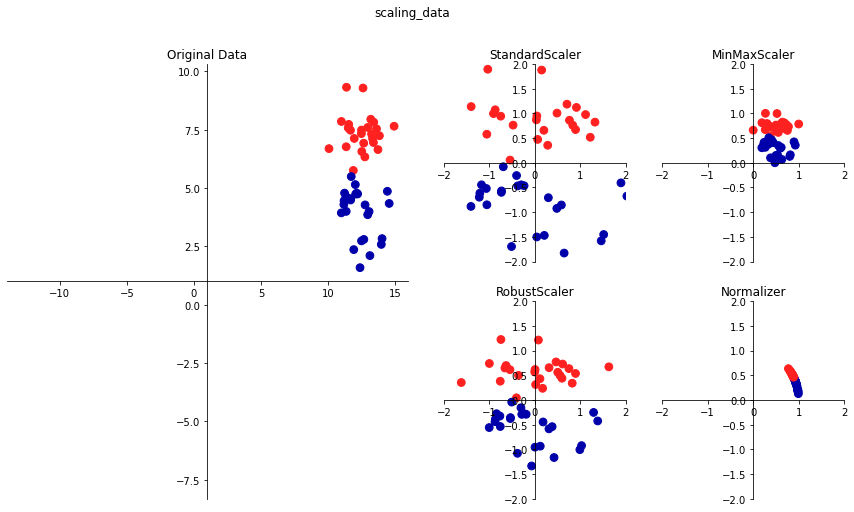

In [2]:
mglearn.plots.plot_scaling()
plt.suptitle("scaling_data")

In [3]:
#Importamos el dataset
from sklearn.datasets import load_breast_cancer
#Importamos para dividir entre datos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Vamos a trabajar el dataset en la variable cancer
cancer = load_breast_cancer()
#Dividimos los datos entre los de entrenamiento y los de prueba
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1) 
print('Datos de la forma (# de datos, # de características)\n')
print('Datos de entrenamiento:',X_train.shape)
print('Datos de prueba:', X_test.shape)

Datos de la forma (# de datos, # de características)

Datos de entrenamiento: (426, 30)
Datos de prueba: (143, 30)


In [4]:
#Importamos el metodo
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
#Con el .fit le decimos al método con respecto a que conjunto escalar los datos
scaler.fit(X_train)
#En la siguiente linea 'copy=True' crea una copia del dataset
MinMaxScaler(copy=True, feature_range=(0, 1))

MinMaxScaler()

In [6]:
# don't print using scientific notation
np.set_printoptions(suppress=True, precision=2)
# Transformamos los datos
X_train_scaled = scaler.transform(X_train)
# Imprimimos las propiedades del dataset antes y despues de escalar
print("transformed shape: %s" % (X_train_scaled.shape,))
print("per-feature minimum before scaling:\n %s" % X_train.min(axis=0))
print("per-feature maximum before scaling:\n %s" % X_train.max(axis=0))
print("per-feature minimum after scaling:\n %s" % X_train_scaled.min(axis=0))
print("per-feature maximum after scaling:\n %s" % X_train_scaled.max(axis=0))

transformed shape: (426, 30)
per-feature minimum before scaling:
 [  6.98   9.71  43.79 143.5    0.05   0.02   0.     0.     0.11   0.05
   0.12   0.36   0.76   6.8    0.     0.     0.     0.     0.01   0.
   7.93  12.02  50.41 185.2    0.07   0.03   0.     0.     0.16   0.06]
per-feature maximum before scaling:
 [  28.11   39.28  188.5  2501.      0.16    0.29    0.43    0.2     0.3
    0.1     2.87    4.88   21.98  542.2     0.03    0.14    0.4     0.05
    0.06    0.03   36.04   49.54  251.2  4254.      0.22    0.94    1.17
    0.29    0.58    0.15]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [7]:
# Transformamos los datos de prueba
X_test_scaled = scaler.transform(X_test)
# Imprimimos las propiedades de los datos de prueba despues de escalar
print("per-feature minimum after scaling: %s" % X_test_scaled.min(axis=0))
print("per-feature maximum after scaling: %s" % X_test_scaled.max(axis=0))

per-feature minimum after scaling: [ 0.03  0.02  0.03  0.01  0.14  0.04  0.    0.    0.15 -0.01 -0.    0.01
  0.    0.    0.04  0.01  0.    0.   -0.03  0.01  0.03  0.06  0.02  0.01
  0.11  0.03  0.    0.   -0.   -0.  ]
per-feature maximum after scaling: [0.96 0.82 0.96 0.89 0.81 1.22 0.88 0.93 0.93 1.04 0.43 0.5  0.44 0.28
 0.49 0.74 0.77 0.63 1.34 0.39 0.9  0.79 0.85 0.74 0.92 1.13 1.07 0.92
 1.21 1.63]


Text(0.5, 1.0, 'improperly scaled data')

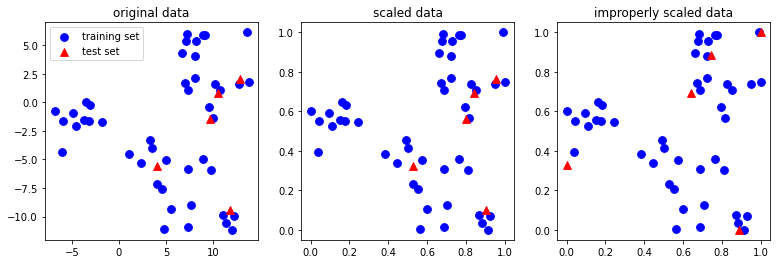

In [8]:
#Importamos make_blobs para crear
from sklearn.datasets import make_blobs
# Creamos datos sintéticos
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# Graficamos los conjuntos de entrenamiento y de prueba
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c='b', label="training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c='r', label="test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("original data")
# Escalamos los datos usando MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Graficamos los datos correctamente escalados
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^', c='r', label="test set", s=60)
axes[1].set_title("scaled data")
# Reescalamos el conujunto de prueba de manera independiente de modo que, el resultado tendra mínimo 0 y máximo 1
# Esto es hecho unicamente para ilustrar el problema, ¡NO DEBE HACERSE!
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# Graficamos los datos mal escalados
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c='b', label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c='r', label="test set", s=60)
axes[2].set_title("improperly scaled data")

In [9]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
svm = SVC(C=100)
#Entrenamos al modelo
svm.fit(X_train, y_train)
#Imprimimos el porcentaje de acierto aplicar el método al conjunto de prueba
print(svm.score(X_test, y_test))

0.8881118881118881


In [10]:
# Procesamos los datos para tenerlos entre 0 y 1
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entrenamos al modelo con los datos de entrenamiento escalados
svm.fit(X_train_scaled, y_train)
# Imprimimos el porcentaje de acierto aplicar el método al conjunto de prueba escalado
svm.score(X_test_scaled, y_test)

0.951048951048951

In [11]:
# Procesamos usando StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entrenamos al modelo con los datos de entrenamiento escalados
svm.fit(X_train_scaled, y_train)
# Imprimimos el porcentaje de acierto aplicar el método al conjunto de prueba escalado
svm.score(X_test_scaled, y_test)

0.958041958041958

In [12]:
# Procesamos usando robustScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entrenamos al modelo con los datos de entrenamiento escalados
svm.fit(X_train_scaled, y_train)
# Imprimimos el porcentaje de acierto aplicar el método al conjunto de prueba escalado
svm.score(X_test_scaled, y_test)

0.972027972027972

In [13]:
# Procesamos usando normalizer
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Entrenamos al modelo con los datos de entrenamiento escalados
svm.fit(X_train_scaled, y_train)
# Imprimimos el porcentaje de acierto aplicar el método al conjunto de prueba escalado
svm.score(X_test_scaled, y_test)

0.8671328671328671

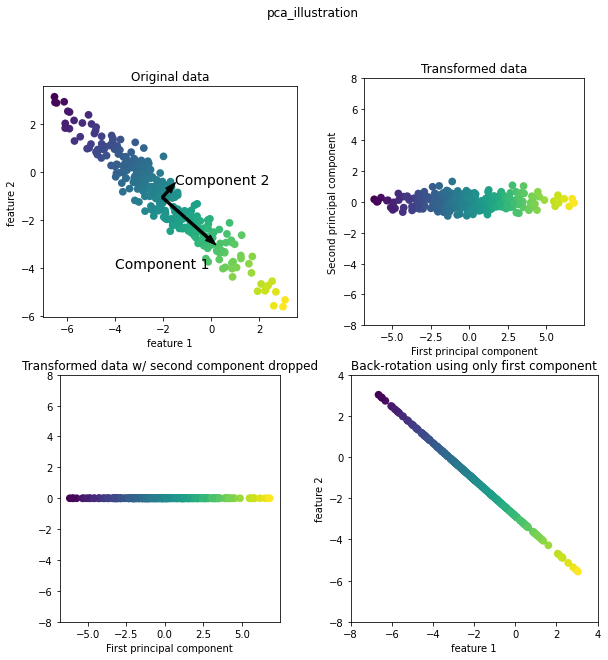

In [14]:
mglearn.plots.plot_pca_illustration()
plt.suptitle("pca_illustration");

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#Escalamos los datos con StandardScaler
scaler = Normalizer()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [16]:
from sklearn.decomposition import PCA
# Mantenemos las primeras 2 componentes principales de los datos
pca = PCA(n_components=2)
# Ajustamos PCA al dataset de cancer ya escalado
pca.fit(X_scaled)
# Transformamos los datos en las primeras dos componentes principales
X_pca = pca.transform(X_scaled)
print('Se imprime (# de puntos, # de características)\n')
print("Forma original: %s" % str(X_scaled.shape))
print("Forma reducida: %s" % str(X_pca.shape))

Se imprime (# de puntos, # de características)

Forma original: (569, 30)
Forma reducida: (569, 2)


Text(0, 0.5, 'Second principal component')

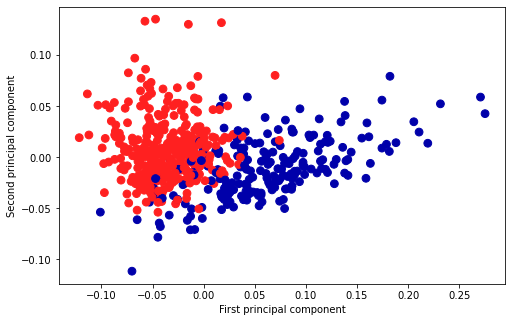

In [17]:
# Graficamos respecto a la primera y segunda componente principal y coloreamos por clase
plt.figure(figsize=(8, 8))
#'c=cancer.target' le asigna el color a los puntos, su etiqueta no fue utilizada en ningún momento
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cancer.target, cmap=mglearn.tools.cm, s=60)
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [18]:
pca.components_.shape

(2, 30)

In [19]:
print(pca.components_)

[[-0.05 -0.09 -0.3  -0.7  -0.   -0.    0.    0.   -0.   -0.   -0.   -0.01
  -0.    0.07 -0.   -0.   -0.   -0.   -0.   -0.   -0.04 -0.11 -0.25  0.58
  -0.   -0.    0.    0.   -0.   -0.  ]
 [ 0.08  0.26  0.49 -0.43  0.    0.    0.    0.    0.    0.    0.    0.02
   0.02  0.06  0.    0.    0.    0.    0.    0.    0.09  0.35  0.6   0.12
   0.    0.    0.    0.    0.    0.  ]]


Text(0.5, 1.0, 'pca_components_cancer')

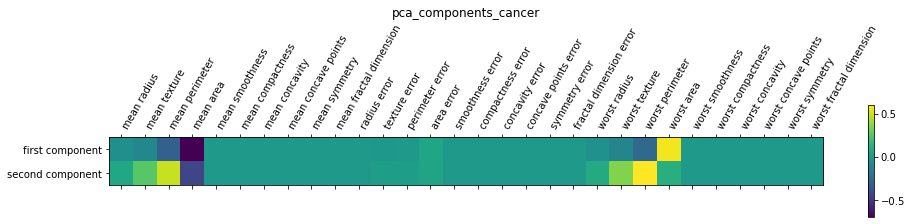

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["first component", "second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left');
plt.title("pca_components_cancer")

Text(0.5, 0.98, 'some_faces')

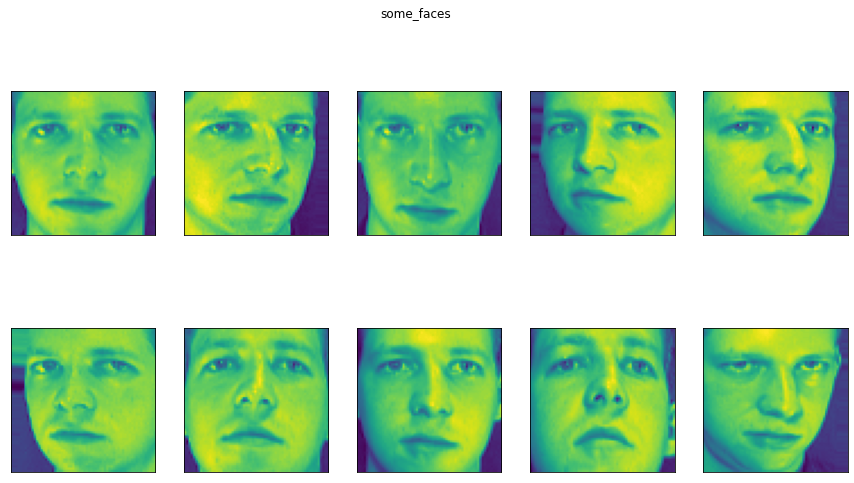

In [21]:
# Importamos el dataset de las fotos
from sklearn.datasets import fetch_olivetti_faces
people = fetch_olivetti_faces()
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 #ax.set_title(people.target_names[target])
plt.suptitle("some_faces")

In [22]:
print('(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):')
print(people.images.shape)
print('Número de personas a las que pertenecen las fotos:')
#print(len(people.target_names))

(# de fotos, # pixeles a lo largo, #pixeles a lo ancho):
(400, 64, 64)
Número de personas a las que pertenecen las fotos:


In [23]:
# Contamos cuantas veces aparece cada target (cada persona)
#counts = np.bincount(people.target)
# Imprimimos el nombre de cada persona y de fotos que tiene en el dataset
#for i, (count, name) in enumerate(zip(counts, people.target_names)):
 #   print("{0:25} {1:3}".format(name, count), '|',end=' ')
  #  if (i + 1) % 3 == 0:
   #     print()

In [24]:
mask = np.zeros(people.target.shape, dtype=np.bool_)
for target in np.unique(people.target):
 mask[np.where(people.target == target)[0][:50]] = 1
X_people = people.data[mask]
y_people = people.target[mask]
# Escalamos los valores de la escala de grises para estar entre 0 y 1 
# en lugar de estar entre 0 y 255 para tener una mehor estabilidad numérica
X_people = X_people / 255

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Dividimos entre datos de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
# Hacemos un KNeighborClassifier tomando en cuenta 1 vecino
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.93

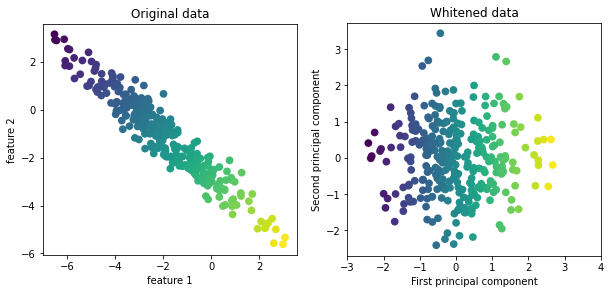

In [26]:
mglearn.plots.plot_pca_whitening()

In [27]:
pca = PCA(n_components=20, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(300, 20)


In [28]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
knn.score(X_test_pca, y_test)

0.95

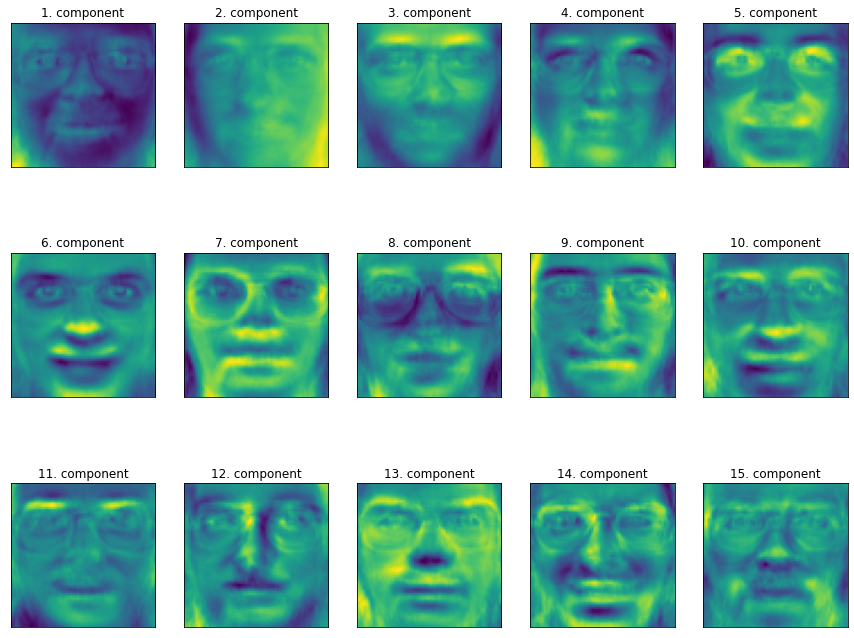

In [29]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("pca_face_components")
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("%d. component" % (i + 1))

In [30]:
#mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
#plt.suptitle("pca_reconstructions");

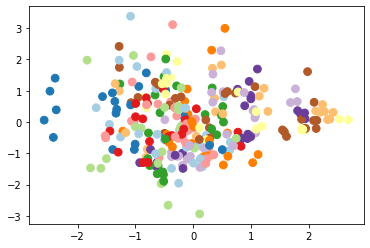

In [31]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Paired', s=60)

/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: 

Text(0.5, 0.98, 'nmf_illustration')

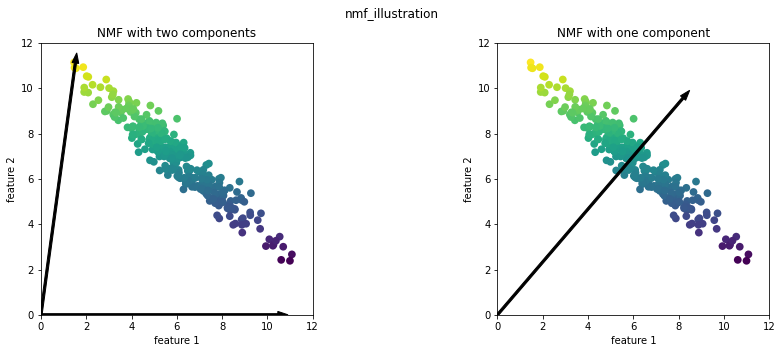

In [32]:
mglearn.plots.plot_nmf_illustration()
plt.suptitle("nmf_illustration")

In [33]:
#mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
/home/tany/anaconda3/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


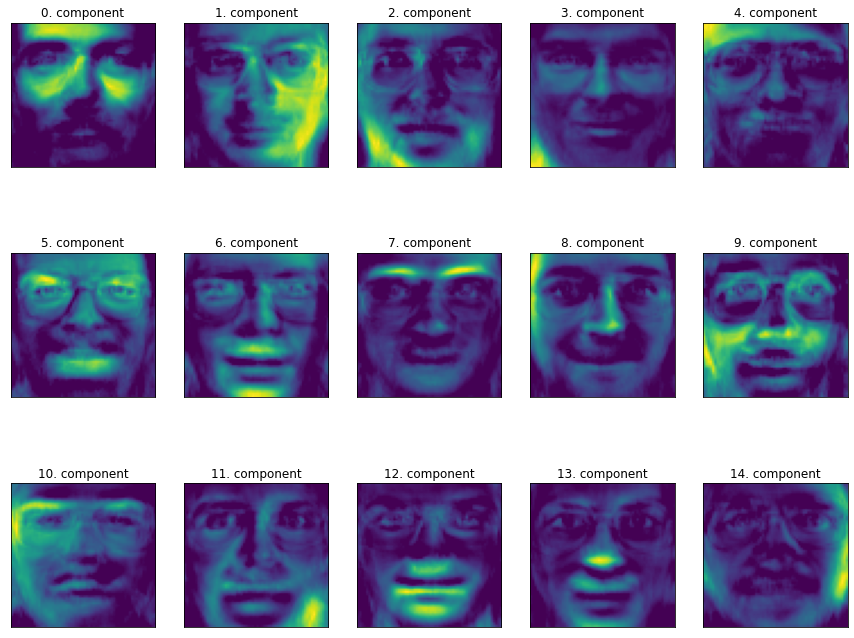

In [46]:
# Imoportamos NMF
from sklearn.decomposition import NMF
# Decimos cuantas componentes queremos y damos la semilla aleatoria
nmf = NMF(n_components=20, random_state=0)
# Decimos con respecto a que conjunto hacer el ajuste
nmf.fit(X_train)
# Transformamos los datos de entrenamiento y prueba
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape))
 ax.set_title("%d. component" % i)

In [47]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_nmf, y_train)
knn.score(X_test_nmf, y_test)

0.87

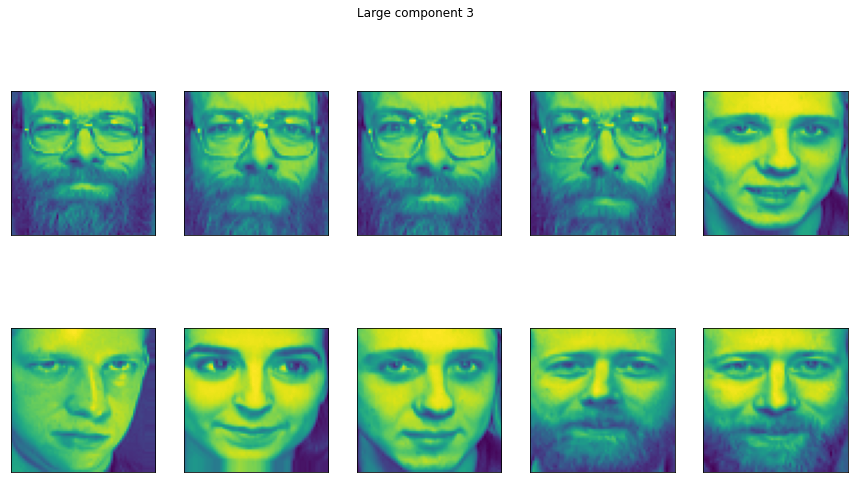

In [48]:
compn = 2
# Imprimimos las fotos más cercanas a la tercera componente
inds = np.argsort(X_train_pca[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Large component 3")
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))

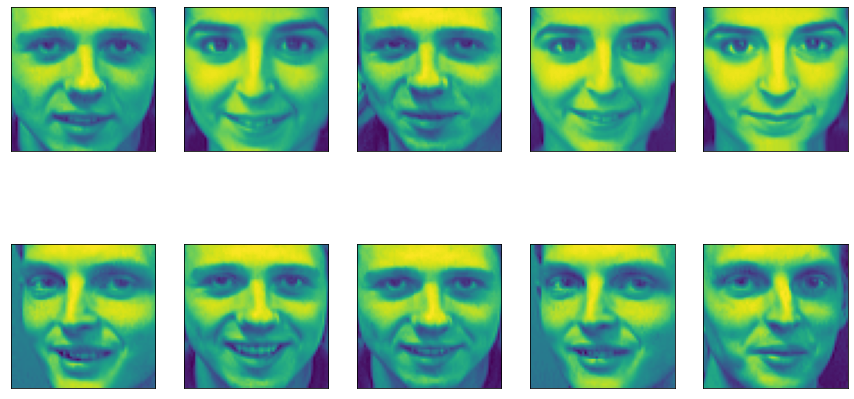

In [49]:
compn = 5
# Imprimimos las fotos más cercanas a la componente 7
inds = np.argsort(X_train_pca[:, compn])[::-1]
fig.suptitle("Large component 7")
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))


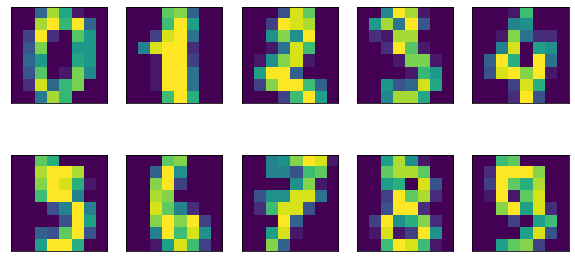

In [38]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)

Text(0, 0.5, 'second principal component')

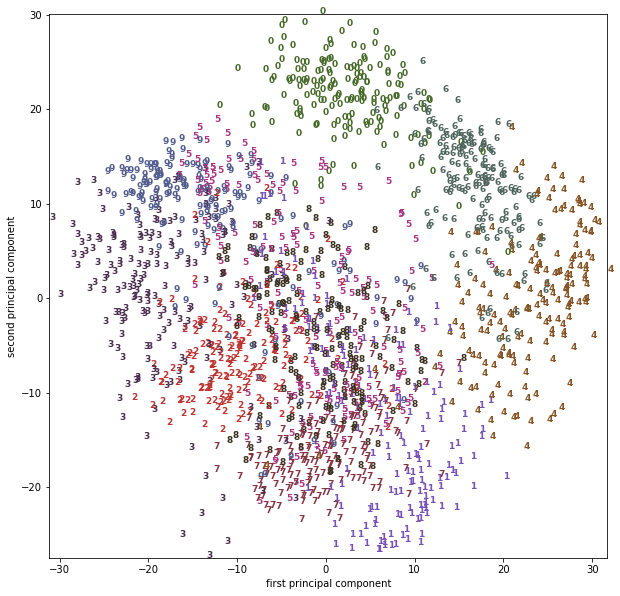

In [39]:
# Creamos el modelo de PCA
pca = PCA(n_components=2)
pca.fit(digits.data)
# Transformamos los datos
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # Imprimimos cada data como el número con el que está etiquetado para que sea fácil de interpretar
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("first principal component")
plt.ylabel("second principal component")

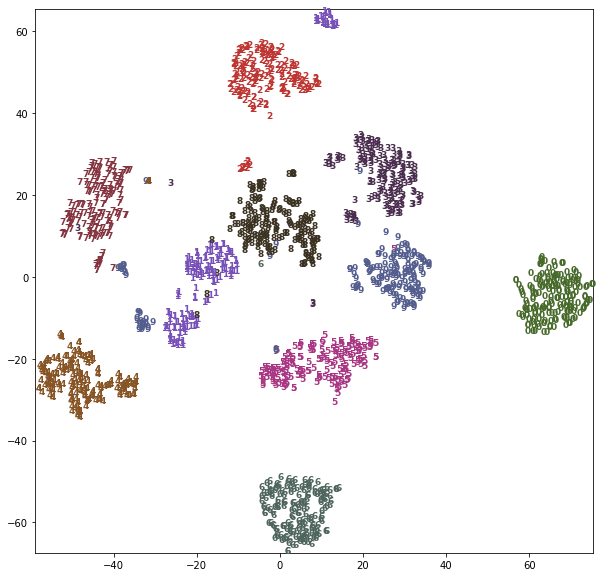

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# Usamos fit_transform en lugar de fit ya que t-SNE no tiene función de transformar 
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # Imprimimos cada data como el número con el que está etiquetado para que sea fácil de interpretar
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})